In [1]:
#ライブラリのインポート
#jupyterでグラフ表示するおまじない
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#plt.style.use('ggplot') 

In [3]:
#データのインポート
tips=pd.read_csv("./tips/tips.csv")

In [4]:
tips.head() #先頭の5行を表示
#tips.head(n=10)とすると先頭の10行表示

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.tail() #末尾の5行を表示
#tips.tail(n=10)とすると末尾の10行表示

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
tips.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

<font size="5"> matplotlibを用いて種々のグラフを描画してみよう！</font><br>
ここでは<br>
・散布図<br>
・棒グラフ<br>
・円グラフ<br>
・ヒストグラム<br>
を扱う

まず、total_billの列を横軸に、tipの列を縦軸にとった以下の散布図を作成。
(pyplotインターフェースで記述)<br>

Text(0, 0.5, 'tip')

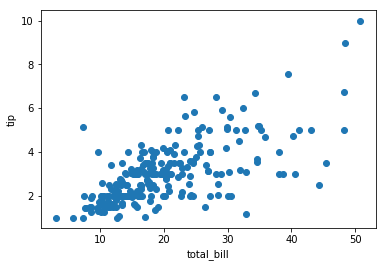

In [7]:
plt.scatter(x=tips["total_bill"],y=tips["tip"]) #散布図(data引数なし)
plt.xlabel("total_bill") #x軸のラベルをtotal_billに
plt.ylabel("tip") #y軸のラベルをtipに

これは、以下のコードと等価である(data引数を使う)

Text(0, 0.5, 'tip')

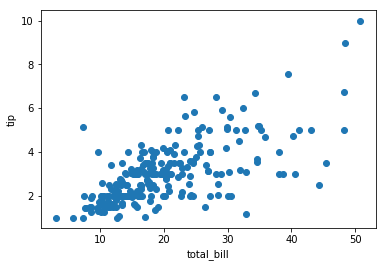

In [8]:
plt.scatter("total_bill","tip",data=tips) #散布図(data引数あり)
plt.xlabel("total_bill")
plt.ylabel("tip")

続いて、各曜日のデータがどれだけ含まれているかを調べる

In [9]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [10]:
tips.day.value_counts().keys()

Index(['Sat', 'Sun', 'Thur', 'Fri'], dtype='object')

この結果を円グラフにしてみよう(pyplotインターフェースで記述)

([<matplotlib.patches.Wedge at 0x1132c0780>,
 [Text(0.47909423581850485, 0.990186201280084, 'Sat'),
  Text(-1.0967192869113325, -0.08489290734035711, 'Sun'),
  Text(0.3074340394718735, -1.0561649072820052, 'Thur'),
  Text(1.06724906774893, -0.2664196452760947, 'Fri')],
 [Text(0.26132412862827537, 0.5401015643345912, '35.7%'),
  Text(-0.598210520133454, -0.04630522218564932, '31.1%'),
  Text(0.16769129425738552, -0.5760899494265482, '25.4%'),
  Text(0.5821358551357799, -0.14531980651423346, '7.8%')])

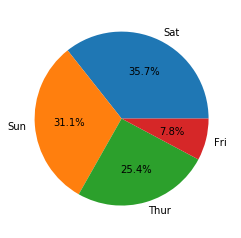

In [11]:
plt.pie(tips.day.value_counts() ,autopct="%.1f%%",  labels=tips.day.value_counts().keys())

Satの部分だけをクローズアップしてみる。
（グラフ全体に影をつけ、円全体からSatの扇型の部分のみを少し切り離す)

([<matplotlib.patches.Wedge at 0x1133104e0>,
 [Text(0.5226482572565507, 1.0802031286691827, 'Sat'),
  Text(-1.0967192869113325, -0.08489290734035711, 'Sun'),
  Text(0.3074340394718735, -1.0561649072820052, 'Thur'),
  Text(1.06724906774893, -0.2664196452760947, 'Fri')],
 [Text(0.30487815006632124, 0.6301184917236897, '35.7%'),
  Text(-0.598210520133454, -0.04630522218564932, '31.1%'),
  Text(0.16769129425738552, -0.5760899494265482, '25.4%'),
  Text(0.5821358551357799, -0.14531980651423346, '7.8%')])

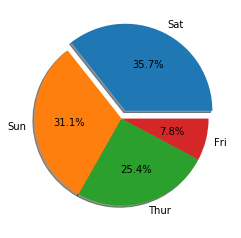

In [12]:
plt.pie(tips.day.value_counts() ,autopct="%.1f%%", labels=tips.day.value_counts().keys(),explode = [0.1,0,0,0] ,shadow=True)

次に、これを棒グラフで表現してみよう。

In [13]:
day=tips.day.value_counts().keys()
counts=tips.day.value_counts().values
plt.bar(left=range(4),height=counts,tick_label=day)

TypeError: bar() missing 1 required positional argument: 'x'

曜日ごとのデータ数のグラフをpandasに備わっているプロットAPIを用いて描画してみよう

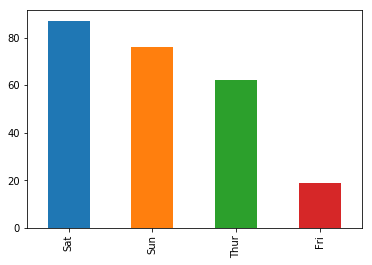

In [14]:
tips.day.value_counts().plot.bar() #pandasビルトインの書き方(後ほど紹介)

seabornを用いて同様の棒グラフを描画してみよう

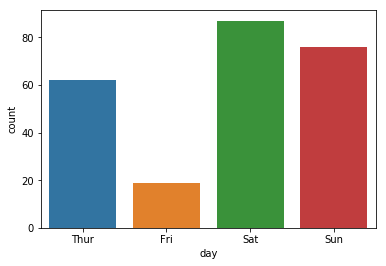

In [15]:
import seaborn as sns
sns.countplot(tips.day,order=["Thur","Fri","Sat","Sun"])

total_billの値がどのように分布しているかをみるために、ヒストグラムを描画してみよう。
ビン数を20として、緑色のヒストグラムを作る<br>

Text(0.5, 1.0, 'histogram of total_bill')

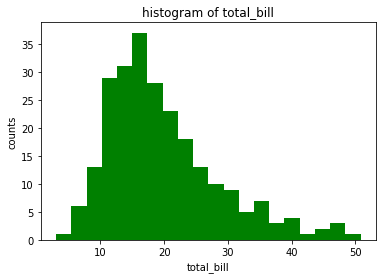

In [16]:
plt.hist(tips.total_bill , bins=20 , color="green")
plt.xlabel("total_bill")
plt.ylabel("counts")
plt.title("histogram of total_bill")

<font size="5"><b>演習問題</b></font><br><br>
上のヒストグラムは曜日を考慮していないため、曜日によってtotal_billの分布がどう変わるかが見えない。<br>
そこで、曜日ごとにヒストグラムを作り、横一列に並べてみよう。（以下の画像を参照）<br>figureのサイズは(16,4)を推奨。<br>
それぞれのヒストグラムの色は<br>
木曜:green,  金曜:purple,  土曜: orange, 日曜:blue　<br>
とする。
また横軸ラベルを"total_bill"、縦軸ラベルを"counts"とし、各グラフに曜日が書かれた凡例を挿入しよう。

<img src="./tips/fig8.jpg" width="1000" ></img>

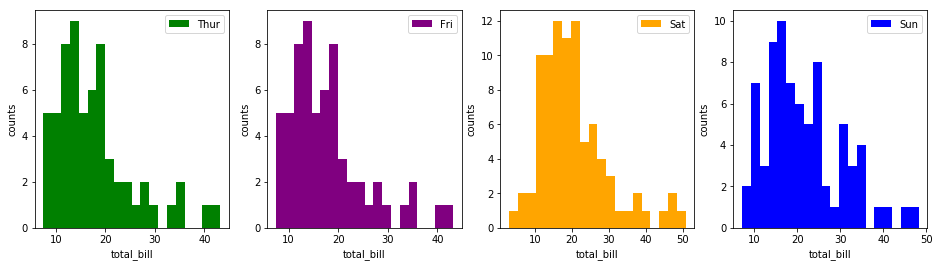

In [17]:
fig,ax=plt.subplots(1,4,figsize=(16,4))
ax[0].hist(tips.loc[tips.day=="Thur","total_bill"] , bins=20 ,  color="green", label="Thur")
ax[1].hist(tips.loc[tips.day=="Thur","total_bill"] , bins=20 , color="purple", label="Fri")
ax[2].hist(tips.loc[tips.day=="Sat","total_bill"] , bins=20 , color="orange",label="Sat")
ax[3].hist(tips.loc[tips.day=="Sun","total_bill"] , bins=20 , color="blue",label="Sun")
for i in range(4):
    ax[i].legend()
    ax[i].set_xlabel("total_bill")
    ax[i].set_ylabel("counts")

このグラフを一つに統合する。（曜日ごとに色分けする）<br>
木曜日、金曜日の売り上げは土日に比べて少ないため<br>
（奥側）　　日＞土＞木＞金　　（手前側）<br>
となるようにグラフを作りましょう。<br>
下の行にplot()関数が書かれたグラフほど手前に表示される。

<img src="./tips/fig9.jpg" width="500"></img>

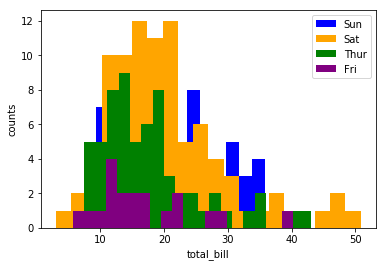

In [18]:
plt.hist(tips.loc[tips.day=="Sun","total_bill"] , bins=20 , color="blue", label="Sun")
plt.hist(tips.loc[tips.day=="Sat","total_bill"] , bins=20 , color="orange",label="Sat")
plt.hist(tips.loc[tips.day=="Thur","total_bill"] , bins=20 , color="green", label="Thur")
plt.hist(tips.loc[tips.day=="Fri","total_bill"] , bins=20 , color="purple",label="Fri")
plt.xlabel("total_bill")
plt.ylabel("counts")
plt.legend()

In [19]:
#pandasビルトイン描画方法

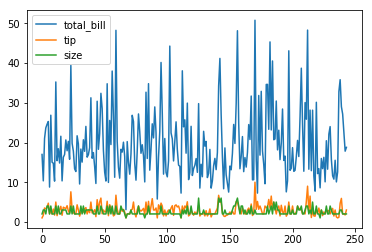

In [20]:
tips.plot()

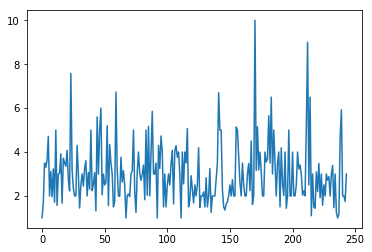

In [21]:
tips.tip.plot.line()

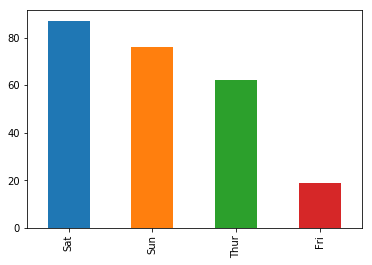

In [22]:
tips.day.value_counts().plot.bar()

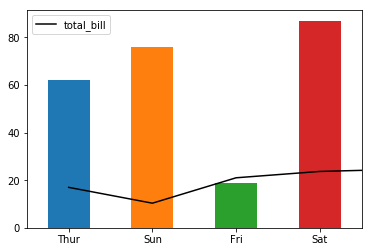

In [23]:
ax=tips.day.value_counts(sort=False).plot.bar()
tips[["day","total_bill"]].plot(ax=ax,color="black")